In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import numpy as np

features_for_mood = ['energy', 'liveness', 'tempo', 'speechiness',
                                     'acousticness', 'instrumentalness', 'danceability', 'duration_ms',
                                     'loudness', 'valence']

data = pd.read_csv('tracks3.csv')
hyper_opt = False

#split into trainval and test
trainx, testx, trainy, testy = train_test_split(data[features_for_mood], data['mood'], test_size = 0.33,
                                                random_state = 42, stratify=data['mood'])

scaler = StandardScaler()
train_scaled = scaler.fit_transform(trainx)

nn = MLPClassifier(max_iter = 15000, alpha=1.0, hidden_layer_sizes=8)
scores = cross_val_score(nn, train_scaled, trainy, cv=5)
print ("cv score: " + str(scores.mean()))

if hyper_opt:
    params = {"alpha": np.logspace(-4, 2, 7), 'hidden_layer_sizes': [1, 2, 5, 10, 20, 50, 100]}
    clf = GridSearchCV(nn, params)
    clf.fit(train_scaled, trainy)
    print("hyperparam optimized score : " + str(clf.best_score_))
    import pdb
    pdb.set_trace()

cv score: 0.6598064516129032


In [47]:
from sklearn.model_selection import cross_validate

In [48]:
results = cross_validate(nn, train_scaled, trainy, return_train_score=True)

In [49]:
results

{'fit_time': array([0.51912761, 0.48386359, 0.44078565, 0.40482426, 0.72999001]),
 'score_time': array([0.        , 0.00150752, 0.0009923 , 0.00169373, 0.        ]),
 'test_score': array([0.592     , 0.68      , 0.688     , 0.61290323, 0.7016129 ]),
 'train_score': array([0.72690763, 0.73895582, 0.70080321, 0.72144289, 0.70741483])}

In [50]:
nn = MLPClassifier(hidden_layer_sizes=8, max_iter=15000, alpha=1.0)

In [51]:
nn.fit(train_scaled, trainy)
test_preds = nn.predict(scaler.transform(testx))
accuracy_score(test_preds, testy)

0.6840390879478827

In [52]:
import seaborn as sn
from sklearn.metrics import confusion_matrix

In [53]:
conf_matrix = confusion_matrix(testy, test_preds, labels = data['mood'].unique().tolist())

In [67]:
labels = data['mood'].unique().tolist()
import csv
print(test_preds)
with open('Predictions.csv', 'w', newline = '') as csvfile:
    my_writer = csv.writer(csvfile, delimiter = '\n')
    my_writer.writerow(test_preds)

['Happy' 'Happy' 'Dark' 'Energetic' 'Happy' 'Happy' 'Dark' 'Relaxing'
 'Happy' 'Dark' 'Energetic' 'Dark' 'Energetic' 'Dark' 'Happy' 'Dark'
 'Energetic' 'Dark' 'Dark' 'Happy' 'Aggressive' 'Aggressive' 'Aggressive'
 'Relaxing' 'Dark' 'Dark' 'Dark' 'Dark' 'Happy' 'Relaxing' 'Dark' 'Happy'
 'Dark' 'Dark' 'Energetic' 'Happy' 'Dark' 'Aggressive' 'Energetic'
 'Energetic' 'Aggressive' 'Energetic' 'Relaxing' 'Aggressive' 'Aggressive'
 'Aggressive' 'Dark' 'Dark' 'Aggressive' 'Relaxing' 'Dark' 'Relaxing'
 'Energetic' 'Dark' 'Dark' 'Energetic' 'Energetic' 'Happy' 'Energetic'
 'Dark' 'Aggressive' 'Happy' 'Relaxing' 'Relaxing' 'Dark' 'Energetic'
 'Aggressive' 'Aggressive' 'Dark' 'Dark' 'Happy' 'Dark' 'Happy' 'Happy'
 'Relaxing' 'Happy' 'Aggressive' 'Happy' 'Energetic' 'Happy' 'Aggressive'
 'Aggressive' 'Dark' 'Dark' 'Happy' 'Energetic' 'Happy' 'Energetic'
 'Aggressive' 'Relaxing' 'Energetic' 'Relaxing' 'Happy' 'Aggressive'
 'Relaxing' 'Dark' 'Energetic' 'Happy' 'Dark' 'Relaxing' 'Happy'
 'Aggressive

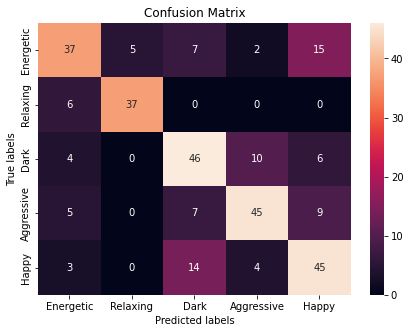

In [55]:
plt.rcParams['figure.figsize'] = (7,5)
ax = plt.subplot()
sn.heatmap(conf_matrix, annot=True)
#labels = data['mood'].tolist()
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,10)

In [57]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, val_scores = learning_curve(nn, train_scaled, trainy, cv=5)

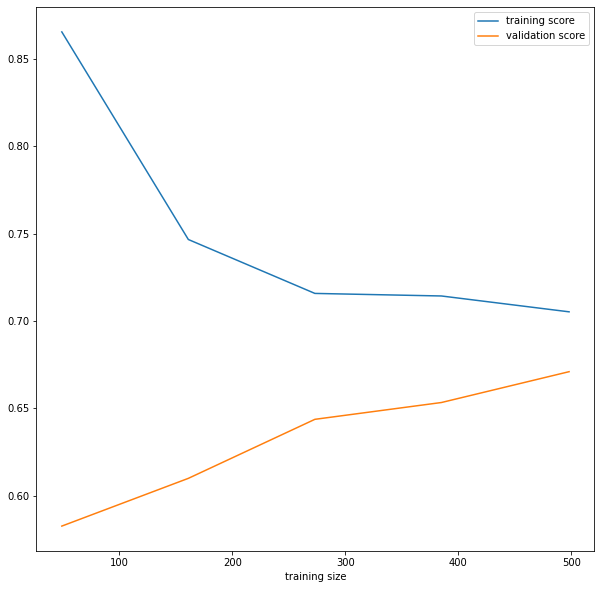

In [58]:
train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, label='training score')
plt.plot(train_sizes, val_scores_mean, label='validation score')
plt.xlabel('training size')
plt.legend()